In [1]:
# %load setup.py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

# Calibration


In this notebook, we will calibrate the parameters based on U.S data between 2001 and 2019.

We will fetch the data from FRED. To do this, we will use the `fredapi` package. 

In [2]:
from fredapi import Fred
# API key needs to be taken out when deployed
fred = Fred(api_key='30adf5295a539a48e57fe367896a60e9')

Our calibration period goes from 2001 to 2019.

In [3]:
start_date = '2001-01-01'
end_date = '2019-12-31'

## Calibration of $s$

$s$ is the job separation rate. We will calibrate it as the average value of the US separation data over our sample period. 

In [4]:
s_ts = fred.get_series('JTSTSR', frequency='q', observation_start=start_date, observation_end=end_date)/100

Here is what the U.S job separation rate looks like over our sample period.

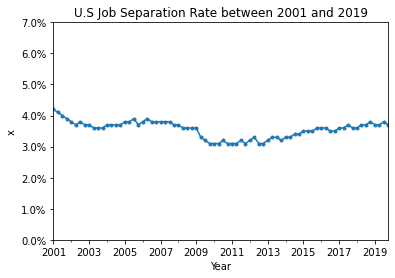

In [5]:
s_ax = s_ts.plot(title="U.S Job Separation Rate between 2001 and 2019", marker='.')
s_ax.set(xlabel='Year', ylabel='x', ylim=(0, 0.07))
s_ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

We can now calibrate $s$ for our model:

In [6]:
s = s_ts.mean()
s

0.03557894736842106

## Calibration of $\bar{u}$

We now calibrate $\bar{u}$, which is the steady-state unemployment rate. We calibrate it as the average value of the US unemployment rate over our sample period.

In [7]:
u_ts = fred.get_series('UNRATE', frequency='q', observation_start=start_date, observation_end=end_date)/100

This is what unemployment rate in the U.S looks like over our sample period:

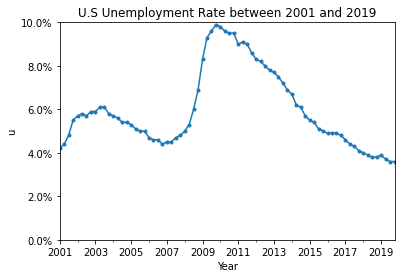

In [8]:
u_ax = u_ts.plot(title="U.S Unemployment Rate between 2001 and 2019", marker='.')
u_ax.set(xlabel='Year', ylabel='u', ylim=(0, 0.1))
u_ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

Taking the average gives us the calibrated value of $\bar{u}$:

In [9]:
u_bar = u_ts.mean()
u_bar

0.05974999999999999

## Calibration of $\bar{x}$

We will now claibrate $\bar{x}$, which is the steady-state labor market tightness. We will calibrate it as the average value of the US labor market tightness over our sample period.

Note that labor market tightness is defined as:

$$x(t) = \frac{v(t)}{k-Y(t)},$$

where $v$ denotes the vacancy level, $k$ the productive capacity of households, and $Y$ output. Therefore, $k - Y(t)$ is simply the unemployment level, since output comes from services provided by households. 

In [10]:
v_ts = fred.get_series('JTSJOL', frequency='q', observation_start=start_date, observation_end=end_date)
ul_ts = fred.get_series('UNEMPLOY', frequency='q', observation_start=start_date, observation_end=end_date)
x_ts = v_ts/ul_ts

Here is what the labor market tightness looks like over our sample period.

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'x'), (0.0, 1.2)]

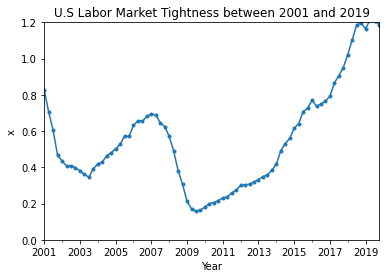

In [11]:
x_ax = x_ts.plot(title="U.S Labor Market Tightness between 2001 and 2019", marker='.')
x_ax.set(xlabel='Year', ylabel='x', ylim=(0, 1.2))

We can now calculate the steady-state labor market tightness $\bar{x}$:

In [12]:
x_bar = x_ts.mean()
x_bar

0.557752047505985

## Calibration of $\overline{G/C}$

$\overline{G/C}$ is the steady-state ratio between public and private employment. We will calibrate it as the average value of the ratio between public and private employment in the U.S over our sample period. 

In [13]:
G_ts = fred.get_series('USGOVT', frequency='q', observation_start=start_date, observation_end=end_date)
C_ts = fred.get_series('USPRIV', frequency='q', observation_start=start_date, observation_end=end_date)
GC_ts = G_ts/C_ts

This is what the ratio between public and private employment looks like over our sample period:

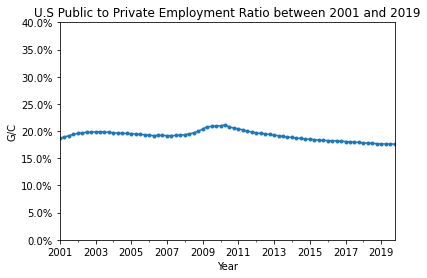

In [14]:
GC_ax = GC_ts.plot(title="U.S Public to Private Employment Ratio between 2001 and 2019", marker='.')
GC_ax.set(xlabel='Year', ylabel='G/C', ylim=(0, 0.4))
GC_ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

We now calibrate the steady-state ratio $\overline{G/C}$, and find the long-run average ratio between public and private employment to be around $19.2\%$.

In [15]:
GC_bar = GC_ts.mean()
GC_bar

0.19191729280673472

## Calibration of $\bar{M}$ 

The parameter $\bar{M}$ is the average unemployment multiplier, which is the same as the output multiplier. The unemployment multiplier is estimated by measuring the percentage-point change in the unemployment rate when public expenditure increases by $1\%$ of GDP. 

Monacelli et al. ([2010](http://dx.doi.org/10.1016/j.jmoneco.2010.05.009), pp. 533–536) estimate a structural vector autoregression (SVAR) on U.S. data and find unemployment multipliers between $0.2$ and $0.6$. Ramey ([2013](http://doi.org/10.7208/chicago/9780226018584.003.0002), pp.40–42) estimates SVARs on U.S. data with various identification schemes and sample periods and finds unemployment multipliers between $0.2$ and $0.5$, except in one specification where the multiplier is $1$.

The multiplier entering our formula could be larger if multipliers are larger when unemployment is higher, as suggested by recent research on state-dependent multipliers. For instance, estimating regime-switching SVARs on U.S. data, Auerbach and Gorodnichenko ([2012](http://doi.org/10.1257/pol.4.2.1), table 1) find that while the output multiplier is $0.6$ in expansions and $1$ on average, it is as high as $2.5$ in recessions.

Thus, we will use a range of unemployment multipliers with lower bound $0$, upper bound $2$, and median $1$.

In [16]:
M_bar_h, M_bar_l = 2, 0
M_bar = 1

## Calibration of $\epsilon$

The parameter $\epsilon$ is the elasticity of substitution between public and private consumption. Amano and Wirjanto ([1997](https://doi.org/10.1162/003465397557187), [1998](https://doi.org/10.1006/redy.1998.0021)) estimate the elasticity of substitution between public and private consumption to be 0.9 and 1.56. Here, we consider three values: $\epsilon = 0.5, \epsilon = 1$ and $\epsilon = 1.5.$ You can also play with the parameter values of $\epsilon$.

In [17]:
epsilon_h, epsilon_l = 1.5, 0.5
epsilon = 1

## Calibration of $\eta$    [![Generic badge](https://img.shields.io/badge/MS18a-p.%20D7-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/5.html) 

The parameter $\eta$ is the matching elasticity, which is the elasticity of the matching function with respect to unemployment. A vast literature has attempted to estimate $\eta$. In their survey, Petrongolo
and Pissarides (2001, p. 424) conclude that the estimates of $\eta$ fall between 0.5 and 0.7. Here, we will set $\eta$ to be $0.6$, with an upper bound of $0.7$ and a lower bound of $0.5$.

Check the badge above for reference to a more detailed discussion. 

In [18]:
eta_h, eta_l = 0.7, 0.5
eta = 0.6

 ## Calibration of $\omega$    [![Generic badge](https://img.shields.io/badge/MS18a-p.%20G28-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/5.html) 

 
The parameter $\omega$ denotes matching efficacy. 

We calibrate $\omega$ with the following equation: 

                $\omega = \bar{x}^{\eta - 1}\cdot \frac{s\cdot (1-\bar{u})}{\bar{u}\cdot e}, $              [![Generic badge](https://img.shields.io/badge/MS19-Eq%203-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  
     
where $e = 1$ is the normalized average job-search effort.

In [19]:
omega_func = lambda eta:x_bar**(eta - 1)*s*(1 - u_bar)/u_bar
omega = omega_func(eta)
omega

0.7071671173494025

## Calibration of $\rho$

To calibrate $\rho$, we use the following relationship between the recruiter-producer ratio ($\tau$) and labor market tightness ($x$):

                $\tau(x) = \frac{\rho s}{q(x) - \rho s}, $              [![Generic badge](https://img.shields.io/badge/MS19-Eq%203-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  
                
where

                $q(x(t)) = \frac{h(t)}{v(t)}=\omega x(t)^{-\eta}.$         [![Generic badge](https://img.shields.io/badge/MS19-p.%201305-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  
                
This gives us that:

                $\rho = \frac{\omega x^{-\eta}\tau}{(1+\tau)s}.$
                
Note that the relationship above holds for all $\tau$'s and $x$'s, we can find $\rho$ if we know what they are at the efficient level. 

When labor market tightness is efficient, we have:

                $(1-\eta)\bar{u}-\eta\bar{\tau} = 0, $            [![Generic badge](https://img.shields.io/badge/MS19-Eq%205-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  

which can be re-arranged into:

                $\bar{\tau} = \frac{(1-\eta)\bar{u}}{\eta}.$ 

With this, we first calculate $\bar{\tau}$ and find that it is around $4\%$.

In [20]:
tau_bar_func = lambda eta:(1 - eta)*u_bar/eta
tau_bar = tau_bar_func(eta)

We can now calibrate $\rho$, which we find to be around $1.08$:

In [21]:
rho_func = lambda eta:omega_func(eta)*x_bar**(-1*eta)*tau_bar_func(eta)/((1 + tau_bar_func(eta))*s)
rho = rho_func(eta)
rho

1.080804575426955

## Calibration of $\tau$

As mentioned earlier, $\tau$ is the recruiter-producer ratio. Recall

                $\tau(x) = \frac{\rho s}{q(x) - \rho s}, $              [![Generic badge](https://img.shields.io/badge/MS19-Eq%203-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html) 
                
where

                $q(x(t)) = \frac{h(t)}{v(t)}=\omega x(t)^{-\eta}.$         [![Generic badge](https://img.shields.io/badge/MS19-p.%201305-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  

We can now calculate a time series for $\tau$.
           

In [22]:
q = lambda x, eta:omega_func(eta)*x**(-eta)
tau_ts_func = lambda eta:rho_func(eta)*s / (q(x_ts, eta) - rho_func(eta)*s)
tau_ts = tau_ts_func(eta)

This is what $\tau$ looks like over our sample period, using the median value of $\eta = 0.6$, with upper bound $\eta = 0.7$ and lower bound $\eta = 0.5$ :

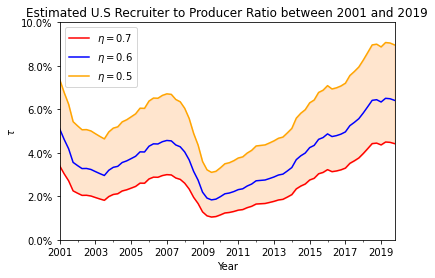

In [23]:
tau_h_ts, tau_l_ts = tau_ts_func(eta_h), tau_ts_func(eta_l) 
tau_range = pd.DataFrame(data={f'$\eta = ${eta_h}':tau_h_ts, 
                               f'$\eta = ${eta}':tau_ts, 
                               f'$\eta = ${eta_l}':tau_l_ts})
tau_range_ax = tau_range.plot(title=r"Estimated U.S Recruiter to Producer Ratio between 2001 and 2019", 
                              color=['red', 'blue', 'orange'])
tau_range_ax.set(xlabel='Year', ylabel=r'$\tau$', ylim=(0, 0.1))
tau_range_ax.fill_between(tau_range.index, tau_range[f'$\eta = ${eta_l}'], tau_range[f'$\eta = ${eta_h}'], 
                          alpha=0.2, color='tab:orange')
tau_range_ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

When calculating the theoretical unemployment multiplier, we take $\tau$ to be the average value of time series, which is around $3.9\%$.

In [24]:
tau_func = lambda eta:tau_ts_func(eta).mean()
tau = tau_func(eta)
tau

0.03873194401199106

## Calibration of $m$

$m$ is the theoretical unemployment multiplier, which measures the response of unemployment to changes in public consumption. $m$ is calibrated according to the relationship below:

                $ m = \frac{(1-u)\cdot M}{1- \frac{G}{Y}\cdot \frac{\eta}{1-\eta}\cdot \frac{\tau}{u}\cdot M},$          [![Generic badge](https://img.shields.io/badge/MS19-Eq%2026-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)
                
where $G/Y$ follows the identity $G/Y = (G/C)/(1+G/C)$. We will use the long-run average $\bar{M}, \bar{u}, \bar{G/C}$ to calculate $\bar{m}$. 

In [25]:
# Identity for conversion between G/Y and G/C
GY_func = lambda GC:GC/(1 + GC)
GY_bar = GY_func(GC_bar)
m_func = lambda M, eta:(1 - u_bar)*M/(1 - GY_bar*(eta)/(1 - eta)*tau_func(eta)*u_bar*M)
m = m_func(M_bar, eta)
m

0.9407758387748196

As we can see above, $m$ is roughly equal to $M$. We can further examine this for different values of $M$ and $\eta$:

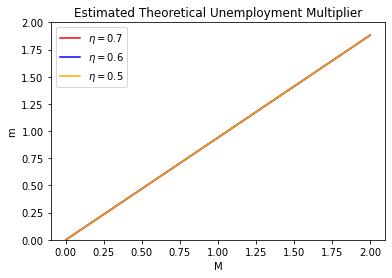

In [26]:
M_vals = np.linspace(start=M_bar_l, stop=M_bar_h, num=101)
m_vals, m_vals_h, m_vals_l = m_func(M_vals, eta), m_func(M_vals, eta_h), m_func(M_vals, eta_l)
m_range = pd.DataFrame(data={f'$\eta = ${eta_h}':m_vals_h, f'$\eta = ${eta}':m_vals,f'$\eta = ${eta_l}':m_vals_l},
                       index=M_vals)
m_range_ax = m_range.plot(title=r"Estimated Theoretical Unemployment Multiplier", color=['red', 'blue', 'orange'])
m_range_ax.set(xlabel='M', ylabel='m', ylim=(0, 2))
m_range_ax.fill_between(m_range.index, m_range[f'$\eta = ${eta_l}'], m_range[f'$\eta = ${eta_h}'], alpha=0.2, color='tab:orange')

As we can see, the choice of $\eta$ within our specified range makes very little difference. 

## Calibration of $z_0$ and $z_1$

Now, we will calibrate $z_0$ and $z_1$. $z_0$ and $z_1$ can be calculated by using the following equations:

                $z_0 = \frac{1}{(1-\eta)(1-\bar{u})^2},$         [![Generic badge](https://img.shields.io/badge/MS19-p.%201315-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  

and 


                $z_1 = \frac{\overline{g/y}\cdot \overline{c/y}}{\bar{u}}.$          [![Generic badge](https://img.shields.io/badge/MS19-p.%201316-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  



In [27]:
z0_func = lambda eta:1/((1 - eta)*(1 - u_bar)**2)
z0 = z0_func(eta)
z0

2.827830175507158

In [28]:
z1 = GY_bar*(1 - GY_bar)/u_bar
z1

2.2609135556386306

# Calculating Optimal Stimulus

We will calculate optimal stimulus with the following equation:

                $\frac{g/c - (g/c)^*}{(g/c)^*} \approx \frac{z_0 \epsilon m}{1 + z_1 z_0\epsilon m^2}\cdot \frac{u_0 - u^*}{u^*}$          [![Generic badge](https://img.shields.io/badge/MS19-Eq%2023-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  

In [29]:
# This function calculates the optimal government spending to private consumption ratio
GC_func = lambda M, eta, epsilon, u0:z0*epsilon*m_func(M, eta)/(1 + z1*z0*epsilon*m_func(M, eta)**2)*(u0-u_bar)/u_bar * GC_bar + GC_bar
stim_func = lambda M, eta, epsilon, u0:GY_func(GC_func(M, eta, epsilon, u0)) - GY_bar

Setting $u_0 = 9\%$ and $\eta = 0.6$, let's look at what the optimal stimulus is for different $M$'s and $\epsilon$'s:

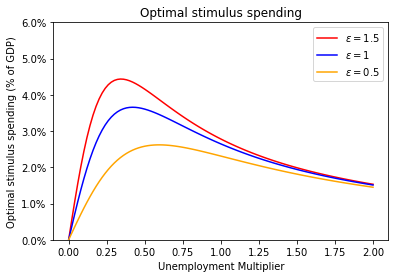

In [30]:
u0 = 0.09
stim_vals = stim_func(M_vals, eta, epsilon, u0)
stim_vals_h = stim_func(M_vals, eta, epsilon_h, u0)
stim_vals_l = stim_func(M_vals, eta, epsilon_l, u0)
stim_range = pd.DataFrame(index=M_vals,
                          data={f'$\epsilon = ${epsilon_h}':stim_vals_h, 
                                f'$\epsilon = ${epsilon}':stim_vals,
                                f'$\epsilon = ${epsilon_l}':stim_vals_l}
                       )
stim_range_ax = stim_range.plot(title=r"Optimal stimulus spending", color=['red', 'blue', 'orange'])
stim_range_ax.set(xlabel='Unemployment Multiplier', ylabel='Optimal stimulus spending (% of GDP)', ylim=(0, 0.06))
stim_range_ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))